In [1]:
# imports
import glob
import numpy as np
import csv
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt

In [28]:
# iterate through files to get data
path       = './*.csv'
ttag       = 'ehningen_14nov22'
tqubits    = 5
tlayers    = 3
tentangler = 'cz'
trhs       = 'hnx'
tarcht     = 'linear_alternating'
topt       = 'NFT'
texact     = True
tcostm     = 'Sato21_Innerp'
#tcostm     = 'Sato21_Nonnorm'
#tcostm     = 'BravoPrieto20_Local'
#tcostm     = 'BravoPrieto20_Global'

counter    = 0
fidelities = {}
for file in glob.glob(path):
    stats     = pd.read_csv(file)
    
    tag       = stats['custom_tag'][0]
    qubits    = stats['qubits'][0]
    params    = stats['parameters'][0]
    layers    = stats['layers'][0]
    rhs       = stats['rhs'][0]
    entangler = stats['entangler'][0]
    archt     = stats['archt'][0]
    exact     = stats['exact'][0]
    costm     = stats['cost'][0]
    
    if (tag       == ttag       and
        qubits    == tqubits    and
        layers    == tlayers    and
        rhs       == trhs       and
        entangler == tentangler and
        archt     == tarcht     and
        exact     == texact     and
        costm     == tcostm):
        
        counter += 1
        fidel    = stats['fidelities'].dropna().iloc[-1]
        
        test     = 0.
        if params in fidelities:
            test = fidelities[params]
        
        val = fidel
        if test > val:
            val = test
        
        fidelities[params] = val
        
fidels = []
for entry in fidelities.items():
    fidels.append([entry[0], entry[1]])

In [191]:
col_headers = ['parameters', 'fidelity']
fidelities  = np.array(fidels)
name        = f'./for_plots/{ttag}_q{tqubits}_archt_{tarcht}_ent_{tentangler}_rhs_{trhs}_cost_{tcostm}.csv'

with open(name, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(col_headers)
    writer.writerows(fidelities)

In [61]:
# iterate through files to get data
path       = './*.csv'
ttag       = ['ehningen_14nov22']
tqubits    = 5
tlayers    = 3
tshots     = 1000
tentangler = 'cz'
trhs       = 'hnx'
tarcht     = 'linear_alternating'
topt       = 'NFT'
texact     = False
#tcostm     = 'Sato21_Innerp'
tcostm     = 'Sato21_Nonnorm'
#tcostm     = 'BravoPrieto20_Local'
#tcostm     = 'BravoPrieto20_Global'

counter        = 0
fidelities     = []
fidelities_acc = []
cost_acc       = []
cost_acc_exact = []
costs          = []
costs_exact    = []
for file in glob.glob(path):
    stats     = pd.read_csv(file)
    
    backend   = stats['backend'][0]
    tag       = stats['custom_tag'][0]
    qubits    = stats['qubits'][0]
    layers    = stats['layers'][0]
    rhs       = stats['rhs'][0]
    entangler = stats['entangler'][0]
    archt     = stats['archt'][0]
    exact     = stats['exact'][0]
    costm     = stats['cost'][0]
    shots     = stats['shots'][0]
    opt       = stats['optimizer'][0]
    
    if (tag       in ttag       and
        qubits    == tqubits    and
        layers    == tlayers    and
        shots     == tshots     and
        rhs       == trhs       and
        entangler == tentangler and
        archt     == tarcht     and
        exact     == texact     and
        opt       == topt       and
        costm     == tcostm):
        
        mapomatic = stats['mapomatic'][0]
        #print(file)
        #print(backend)
        #print(tag)
        #print(shots)
        #print('--------')
        
        counter += 1
        
        cost            = stats['cost_approx'].dropna()
        exact           = stats['cost_exact'].dropna()
        fidels          = stats['fidelities_cost'].dropna()
        cost_acc_       = stats['acc_cost_approx'].dropna()
        cost_acc_exact_ = stats['acc_cost_exact'].dropna()
        fidels_acc      = stats['fidelities'].dropna()
        
        costs.append(cost)
        costs_exact.append(exact)
        fidelities.append(fidels)
        fidelities_acc.append(fidels_acc)
        cost_acc.append(cost_acc_)
        cost_acc_exact.append(cost_acc_exact_)

Total count =  10
Best run    =  8


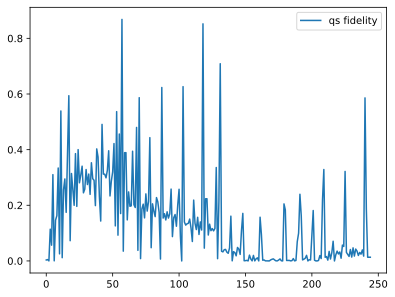

In [62]:
# best cost value per run
length     = len(costs)
best_costs = np.empty(length)
for i in range(length):
    best_costs[i] = np.amin(costs[i])
    
# best run
best        = np.argmin(best_costs)
best_fidels = fidelities[best]
best_approx = costs[best]   
best_exact  = costs_exact[best]
print("Total count = ", counter)
print("Best run    = ", best)

x = list(range(len(best_fidels)))
plt.plot(best_fidels, label="qs fidelity")
#plt.xticks(x)
plt.legend()
plt.show()

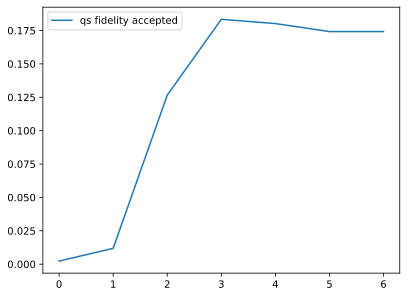

In [28]:
plt.plot(fidelities_acc[best], label="qs fidelity accepted")
plt.legend()
plt.show()

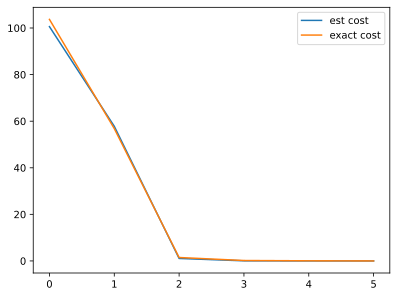

In [29]:
x = list(range(len(best_approx)))
plt.plot(best_approx, label="est cost")
plt.plot(best_exact, label="exact cost")
#plt.xticks(x)
plt.legend()
plt.show()

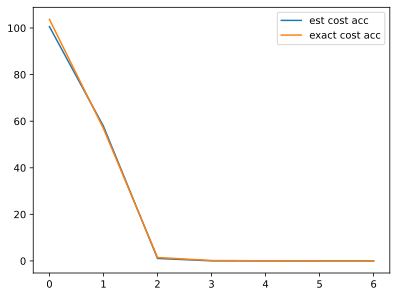

In [30]:
plt.plot(cost_acc[best], label="est cost acc")
plt.plot(cost_acc_exact[best], label="exact cost acc")
plt.legend()
plt.show()

In [257]:
print(len(cost_acc[best]))
print(len(cost_acc_exact[best]))

12
102


In [63]:
idx = np.argmin(best_approx)
best_fidels[idx]

0.0132809365272101

In [60]:
name        = f'./for_plots/{ttag}_backend_{backend}_opt_{topt}_mapomatic_{mapomatic}_q{tqubits}_l{tlayers}_archt_{tarcht}_ent_{tentangler}_rhs_{trhs}_cost_{tcostm}_shots_{tshots}.csv'
index_label = 'eval'
best_fidels.to_csv(name, index_label=index_label)

In [194]:
best_costs

array([-0.19063971, -0.35523124, -0.1021162 , -0.26610198, -0.29105508,
       -0.67915181, -0.17167512, -0.92437096, -0.29722339, -0.33999291,
       -0.20795358, -0.17176913, -0.18984583, -0.23517296, -0.18159872])

In [6]:
# get specific file
target    = 'cdp0ps7trt2d1cmfpurg.csv'
exp_stats = pd.read_csv(target)
exp_stats

,Iteration,custom_tag,backend,cost_approx,cost_exact,cosine_sim,acc_cost_approx,acc_cost_exact,fidelities,fidelities_cost,...,rotations,entangler,mixer,driver,driver_per,initial_qaoa,sabre,mapomatic,mem,DD
0,0,ehningen_14nov22,ibmq_ehningen,-0.000106,-0.001133,NaN,-0.000106,-0.001133,0.007824,0.007824,...,ry,cz,rx,rzz,ryy,hadamards,True,False,False,False
1,1,NaN,NaN,-0.000098,-0.000185,NaN,-0.000037,-0.000808,0.005801,0.002372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,-0.000000,-0.001194,NaN,-0.000071,-0.000553,0.004350,0.005834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,-0.000086,-0.000053,NaN,-0.000001,-0.010816,0.051964,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,-0.000058,-0.002173,NaN,-0.000002,-0.012821,0.059726,0.010938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,NaN,NaN,-0.000121,-0.042886,NaN,NaN,NaN,NaN,0.139350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,241,NaN,NaN,-0.000007,-0.000246,NaN,NaN,NaN,NaN,0.001279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,242,NaN,NaN,-0.000181,-0.002629,NaN,NaN,NaN,NaN,0.000924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,243,NaN,NaN,-0.000023,-0.030303,NaN,NaN,NaN,NaN,0.119742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


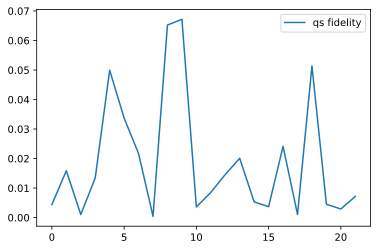

In [117]:
# plot
fidels = exp_stats['fidelities_cost'].dropna()
plt.plot(fidels, label="qs fidelity")
plt.legend()
plt.show()

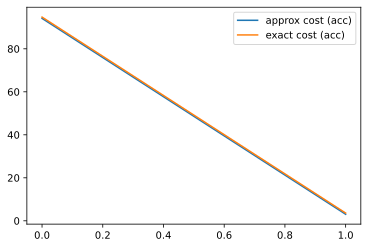

In [101]:
# plot
approx = exp_stats['acc_cost_approx'].dropna()
exact  = exp_stats['acc_cost_exact'].dropna()
plt.plot(approx, label="approx cost (acc)")
plt.plot(exact, label="exact cost (acc)")
plt.legend()
plt.show()

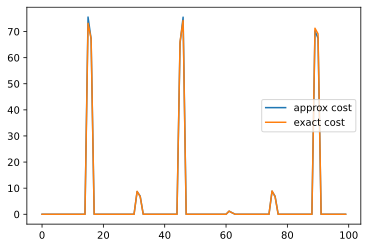

In [109]:
# plot
approx = exp_stats['cost_approx'].dropna()
exact  = exp_stats['cost_exact'].dropna()
plt.plot(approx, label="approx cost")
plt.plot(exact, label="exact cost")
plt.legend()
plt.show()

In [14]:
exp_id    = 'a1b42270-acff-4cfb-a58d-d54bec3c1cd0'
row       = exp_stats.loc[(exp_stats['exp_id']==exp_id)]

In [25]:
reduced = row[['custom_tag']]
reduced

KeyError: "None of [Index(['custom_tag'], dtype='object')] are in the [columns]"

In [66]:
aftermax = reduced.cnots.apply(literal_eval).apply(max)
aftermax = pd.concat([reduced.drop('cnots',axis=1), aftermax],axis=1)
aftermax

,backend,operator,archt,qubits,layers,parameters,shots,samples,mean,std,cnots
59,aer_simulator,Paulis,linear_alternating,5,3,29,1000.0,18,0.022307,0.023998,0
259,aer_simulator,Paulis,linear_alternating,5,3,29,10.0,18,0.140890,0.087482,0
267,aer_simulator,Paulis,linear_alternating,5,3,29,100.0,18,0.051768,0.035167,0
287,aer_simulator,Paulis,linear_alternating,5,3,29,10000.0,18,0.004609,0.004194,0
300,aer_simulator,Paulis,linear_alternating,5,3,29,100000.0,18,0.002407,0.002153,0


In [67]:
sort = aftermax.sort_values(by=['qubits', 'layers', 'shots'])
sort

,backend,operator,archt,qubits,layers,parameters,shots,samples,mean,std,cnots
259,aer_simulator,Paulis,linear_alternating,5,3,29,10.0,18,0.140890,0.087482,0
267,aer_simulator,Paulis,linear_alternating,5,3,29,100.0,18,0.051768,0.035167,0
59,aer_simulator,Paulis,linear_alternating,5,3,29,1000.0,18,0.022307,0.023998,0
287,aer_simulator,Paulis,linear_alternating,5,3,29,10000.0,18,0.004609,0.004194,0
300,aer_simulator,Paulis,linear_alternating,5,3,29,100000.0,18,0.002407,0.002153,0


In [68]:
sort_reset = sort.reset_index(drop=True)
sort_reset

,backend,operator,archt,qubits,layers,parameters,shots,samples,mean,std,cnots
0,aer_simulator,Paulis,linear_alternating,5,3,29,10.0,18,0.140890,0.087482,0
1,aer_simulator,Paulis,linear_alternating,5,3,29,100.0,18,0.051768,0.035167,0
2,aer_simulator,Paulis,linear_alternating,5,3,29,1000.0,18,0.022307,0.023998,0
3,aer_simulator,Paulis,linear_alternating,5,3,29,10000.0,18,0.004609,0.004194,0
4,aer_simulator,Paulis,linear_alternating,5,3,29,100000.0,18,0.002407,0.002153,0


In [69]:
duplicates = sort_reset.drop_duplicates(subset=['shots'], keep='last')
duplicates

,backend,operator,archt,qubits,layers,parameters,shots,samples,mean,std,cnots
0,aer_simulator,Paulis,linear_alternating,5,3,29,10.0,18,0.140890,0.087482,0
1,aer_simulator,Paulis,linear_alternating,5,3,29,100.0,18,0.051768,0.035167,0
2,aer_simulator,Paulis,linear_alternating,5,3,29,1000.0,18,0.022307,0.023998,0
3,aer_simulator,Paulis,linear_alternating,5,3,29,10000.0,18,0.004609,0.004194,0
4,aer_simulator,Paulis,linear_alternating,5,3,29,100000.0,18,0.002407,0.002153,0


In [70]:
duplicates.to_csv(backend+'_'+archt+'_'+operator+'_'+'q'+str(num_qubits)+'l'+str(num_layers)+'_shots'+'.csv')